In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime


In [2]:
match_data=pd.read_csv(r"M:\CODES\IPL DATA ANNALYSIS\IPL Matches 2008-2020.csv")
ball_data=pd.read_csv(r"M:\CODES\IPL DATA ANNALYSIS\IPL Ball-by-Ball 2008-2020.csv")

In [3]:
match_data.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,21-04-2008,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,22-04-2008,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,23-04-2008,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,24-04-2008,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,25-04-2008,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [4]:
ball_data.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
ball_data.shape
#match_data.shape

(193468, 18)

In [8]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

HOW MANY MATCHES PLAYED TILL NOW?
IN WHICH CITIES MATCH ARE PLAYED?
NAME OF ALL THE TEAM PLAYED TILL NOW:

In [9]:
print("matches played so far:",match_data.shape[0])
print("\n cities played at:",match_data['city'].unique())
print("\n Teams participated:",match_data['team1'].unique())

matches played so far: 816

 cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


bring out the season from date


In [10]:
match_data["Season"]=pd.DatetimeIndex(match_data["date"]).year
match_data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


MATCH PLAYED IN EACH SEASON:


In [11]:
match_per_season=match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


TOTAL MATCHES PLAYED IN EACH SEASON IN GRAPH:

m:\APPLICATION\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total matches played in each season')

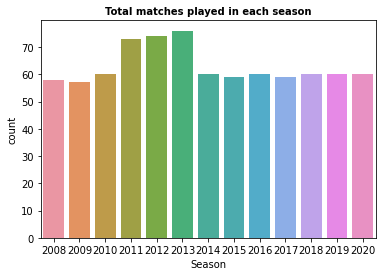

In [12]:
sns.countplot(match_data['Season'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.title('Total matches played in each season',fontsize=10,fontweight='bold')

MERGING SEASON WITH BALL BY BALL DATA


In [13]:
season_data=match_data[['id','Season']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_data.head(10)

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,2008,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,2008,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,2008,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,2008,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,2008,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


total run in each season in graph

<function matplotlib.pyplot.show(close=None, block=None)>

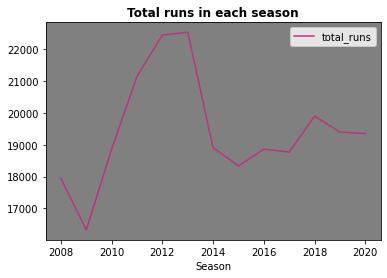

In [14]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax=plt.axes()
ax.set(facecolor='grey')
sns.lineplot(data=p,palette="magma")
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show

In [15]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667
